In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = './../data'
dic = ['/raw/', '/clean/']
data_name = 'metro-bike-share-trips-'
yr = ['2016-q3', '2016-q4', '2017-q1', '2017-q2','2017-q3','2017-q4','2018-q1','2018-q2','2018-q3','2018-q4','2019-q1']
extension = '.csv'

In [3]:
list_station = []
for i in range(11):
    # Read data
    station_id = {}
    file_path = path + dic[0]+ data_name + yr[i] + extension
    raw_data = None
    raw_data = pd.read_csv(file_path)
    row = raw_data['start_station_id']
    for j in range(len(row)):
        if row[j] not in station_id:
            station_id[row[j]] = 1
    row = raw_data['end_station_id']
    for j in range(len(row)):
        if row[j] not in station_id:
            station_id[row[j]] = 1
    list_station.append(station_id)
    print(yr[i] + '\t' + str(len(station_id)))

2016-q3	64
2016-q4	63
2017-q1	65
2017-q2	87
2017-q3	122
2017-q4	121
2018-q1	120
2018-q2	123
2018-q3	128
2018-q4	97
2019-q1	146


In [4]:
erase = []
install = []
for i in range(10):
    stations = []
    for element in sorted(list_station[i+1]):
        if element not in list_station[i]:
            stations.append(element)
    install.append(stations)
    stations = []
    for element in sorted(list_station[i]):
        if element not in list_station[i+1]:
            stations.append(element)
    erase.append(stations)

In [5]:
for i in range(10):
    print(install[i])

[3000]
[3009, 3039]
[3061, 4138, 4142, 4143, 4144, 4146, 4148, 4150, 4151, 4155, 4156, 4157, 4159, 4160, 4162, 4163, 4165, 4167, 4169, 4170, 4176, 4177, 4181, 4183]
[3013, 4110, 4118, 4125, 4126, 4127, 4129, 4130, 4131, 4132, 4133, 4134, 4135, 4136, 4147, 4149, 4152, 4153, 4154, 4158, 4166, 4174, 4180, 4194, 4202, 4204, 4205, 4206, 4207, 4208, 4209, 4210, 4211, 4212, 4213, 4214, 4215, 4216]
[4220, 4227]
[]
[4244, 4249, 4254]
[4245, 4246, 4248, 4250, 4267]
[4266, 4273, 4275, 4276]
[4285, 4286, 4293, 4300, 4304, 4306, 4311, 4312, 4313, 4314, 4315, 4322, 4323, 4324, 4325, 4328, 4329, 4330, 4331, 4332, 4333, 4334, 4335, 4336, 4340, 4341, 4342, 4343, 4344, 4345, 4346, 4347, 4348, 4349, 4350, 4351, 4352, 4353, 4354, 4356, 4357, 4369, 4372, 4373, 4374, 4378, 4379, 4380, 4381, 4382, 4385]


In [6]:
for i in range(10):
    print(erase[i])

[3021, 3053]
[]
[3009, 3059]
[3039, 3061, 4143]
[4110, 4118, 4194]
[3060]
[]
[]
[3055, 3079, 3080, 4138, 4142, 4144, 4146, 4147, 4148, 4149, 4150, 4151, 4152, 4153, 4154, 4155, 4156, 4157, 4158, 4159, 4160, 4162, 4163, 4165, 4166, 4167, 4169, 4170, 4174, 4176, 4177, 4180, 4181, 4183, 4244]
[4108, 4276]


In [7]:
list_freq = []
for i in range(10):
    freq = {}
    file_path = path + dic[0]+ data_name + yr[i] + extension
    raw_data = None
    raw_data = pd.read_csv(file_path)
    row1 = raw_data['start_station_id']
    row2 = raw_data['end_station_id']
    
    for k in range(len(erase[i])):
        freq[erase[i][k]] = 0
    
    for j in range(len(row1)):
        if erase[i] == []:
            continue
        if (row1[j] in erase[i]) and (row2[j] in erase[i]):
            freq[row1[j]] += 2
        elif (row1[j] in erase[i]) and (row2[j] not in erase[i]):
            freq[row1[j]] += 1
        elif (row1[j] not in erase[i]) and (row2[j] in erase[i]):
            freq[row2[j]] += 1
    
    print(i+1, '\t', freq)
    
    list_freq.append(freq)

1 	 {3021: 2744, 3053: 25}
2 	 {}
3 	 {3009: 124, 3059: 334}
4 	 {4143: 4, 3061: 112, 3039: 1}
5 	 {4194: 189, 4118: 28, 4110: 221}
6 	 {3060: 196}
7 	 {}
8 	 {}
9 	 {4160: 258, 4162: 719, 4163: 459, 4165: 419, 4166: 249, 3079: 15, 3080: 5, 4169: 356, 4170: 343, 4174: 208, 4176: 829, 4177: 354, 4180: 654, 4181: 542, 4183: 414, 4244: 179, 4138: 458, 4167: 128, 4142: 587, 3055: 2100, 4144: 511, 4146: 172, 4147: 305, 4148: 177, 4149: 229, 4150: 232, 4151: 598, 4152: 144, 4153: 787, 4154: 315, 4155: 234, 4156: 153, 4157: 170, 4158: 268, 4159: 626}
10 	 {4276: 303, 4108: 4}


Average, Max, min<br>
Pick 3 worst station

In [18]:
Max = 0
Min = 100000
average = []
worst = []
list_count = []
for i in range(10):
    
    file_path = path + dic[0]+ data_name + yr[i] + extension
    raw_data = None
    raw_data = pd.read_csv(file_path)
    avg = len(raw_data)*2 / len(list_station[i])
    average.append(int(avg))
    print("Avg", i+1, ": ", avg)
    
    count = {}
    row = raw_data['start_station_id']
    for j in range(len(row)):
        if row[j] not in count:
            count[row[j]] = 1
        else:
            count[row[j]] += 1
            
    row = raw_data['end_station_id']
    for j in range(len(row)):
        if row[j] not in count:
            count[row[j]] = 1
        else:
            count[row[j]] += 1
    
    list_count.append(count)

Avg 1 :  1732.46875
Avg 2 :  1371.3650793650793
Avg 3 :  1039.5692307692307
Avg 4 :  1193.5172413793102
Avg 5 :  1185.8524590163934
Avg 6 :  1177.090909090909
Avg 7 :  1089.7833333333333
Avg 8 :  1257.8373983739837
Avg 9 :  1488.796875
Avg 10 :  1523.0309278350514


In [33]:
list_max = []
list_min = []
list_worst = []
for i in range(len(list_count)):
    idx = max(list_count[i], key=list_count[i].get)
    Max = list_count[i][idx]
    list_max.append({idx:Max})
    idx = min(list_count[i], key=list_count[i].get)
    Min = list_count[i][idx]
    list_min.append({idx:Min})
    

In [34]:
list_max

[{3014: 4456},
 {3005: 3955},
 {3082: 3143},
 {3005: 5217},
 {3005: 5804},
 {4214: 6355},
 {4214: 6520},
 {4214: 7011},
 {4214: 10854},
 {3005: 7323}]

In [35]:
list_min

[{3053: 25},
 {4108: 32},
 {3080: 69},
 {4183: 1},
 {4118: 28},
 {4108: 11},
 {4108: 25},
 {4108: 4},
 {3080: 5},
 {4108: 4}]

In [113]:
x0 = [2016.5, 2016.75, 2017.0, 2017.25, 2017.5, 2017.75, 2018.0, 2018.25, 2018.50, 2018.75]
x, y = [], []
for i in range(len(list_freq)):
    for j in range(len(list_freq[i])):
        x.append(x0[i])
        y.append(list(list_freq[i].values())[j])

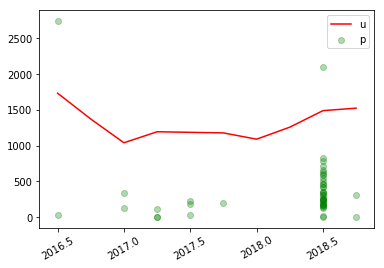

In [115]:
plt.plot(x0, average, color='red')
plt.scatter(x, y, color='green', alpha=0.3)
plt.xticks(rotation=30)
plt.legend('upper right')
plt.show()

In [94]:
len(average)

10